In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from ElabClient import ElabClient  # ElabFTW API wrapper
from ElabBridge import ElabBridge  # new sync helper
from labmate.acquisition_notebook import AcquisitionAnalysisManager

# Step 1: Initialize the API client (uses env vars API_KEY, API_HOST_URL)
path_to_conf_file = ''
client = ElabClient(path_to_conf_file + '/elab_server.conf')
backend = ElabBridge(client)

In [ ]:
local_data_path = ''
aqm = AcquisitionAnalysisManager(local_data_path, backend=backend)

In [14]:
# Labmate acquisition cell, used as usual, 
# but the data will be saved both locally 
# and in an ElabFTW experiment, asynchronously
aqm.acquisition_cell('Experience 05')
x = np.arange(10)
y = x**2
aqm.save_acquisition(x=x, y=y)

INFO:1:2026_02_06__23_01_18__Experience 05


INFO:2026_02_06__23_01_18__Experience 05


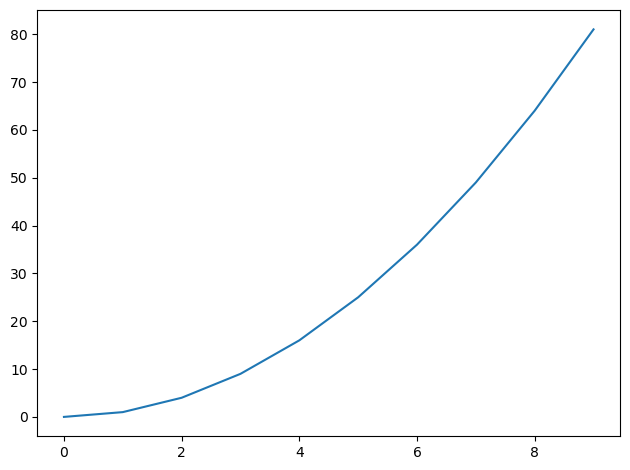

In [16]:
# Labmate analysis cell. Data are retrieved and plot, 
# the figure is saved both locally and on the corresponding 
# ELabFTW experiment
aqm.analysis_cell()
data = aqm.data
fig = plt.figure(1)
plt.plot(data.x, data.y)
aqm.save_fig(fig)